#### 1) pip install opencv-python. Let’s import OpenCV and enter the input image path on which face is to be detected.

In [1]:
import cv2

In [2]:
imagePath = 'input_image.jpg'

#### We need to read the image with OpenCV’s imread() function. This will load the image from the specified file path and return it in the form of a Numpy array. 

In [3]:
img = cv2.imread(imagePath)

In [4]:
#printing the dimension of array.
img.shape

(960, 960, 3)

#### Notice that this is a 3-dimensional array. The array’s values represent the picture’s height, width, and channels respectively. Since this is a color image, there are three channels used to depict it - blue, green, and red (BGR). Note that while the conventional sequence used to represent images is RGB (Red, Blue, Green), the OpenCV library uses the opposite layout (Blue, Green, Red).

In [5]:
#To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# Notice that this array only has two values since the image is grayscale and no longer has the third color channel.
gray_image.shape

(960, 960)

#### This code initializes a CascadeClassifier object named 'face_classifier' using the 'haarcascade_frontalface_default.xml' file. 
1) The CascadeClassifier is a class in the OpenCV library that is used for object detection.  
2) The 'haarcascade_frontalface_default.xml file' is a pre-trained classifier that is used to detect frontal faces in an image or video stream.  
3)  The cv2.data.haarcascades is a path to the directory where the pre-trained classifiers are stored in the OpenCV library.  
4)  The + operator is used to concatenate the path with the name of the classifier file.  
5)   Overall, this code initializes a face classifier object that can be used to detect faces in an image or video stream.

In [7]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

#### here, detectMultiScale(): This is a function provided by OpenCV for object detection, including face detection. It takes 4 parametes. 
a) gray_image= converted grayscale image  
b) scaleFactor= it is like searching for faces in different sizes.  
c) minNeighbors= if 5 objects with similarity is found, then only detected as face else not.  
d) minSize= Faces smaller than 40*40 size won't be detected\\

In [8]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)



### This code snippet is used to draw green rectangles around detected faces in an image using the OpenCV library. Let's break it down step by step:

for (x, y, w, h) in face::

It starts a loop that iterates over a list of detected faces (face). For each detected face, it extracts four values: x, y, w, and h.
x and y represent the coordinates of the top-left corner of the rectangle that surrounds the face.
w and h represent the width and height of the rectangle, defining its size.
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4):

cv2.rectangle: This is a function from OpenCV used to draw rectangles.
img: It's the image on which you want to draw rectangles.
(x, y): This is the starting point of the rectangle, which is the top-left corner, specified by the coordinates (x, y) extracted from the loop.
(x + w, y + h): This is the ending point of the rectangle, which is the bottom-right corner, calculated by adding the width w to x and the height h to y.
(0, 255, 0): This is the color of the rectangle, specified as a tuple representing the color in BGR format. In this case, it's green, indicated by (0, 255, 0).
4: This is the thickness of the rectangle's lines. It defines how wide the lines that make up the rectangle should be.
So, this code essentially iterates through the list of detected faces and draws a green rectangle around each face in the img image.

In [9]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [10]:
# again changing back to colored rgb image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 959.5, 959.5, -0.5)

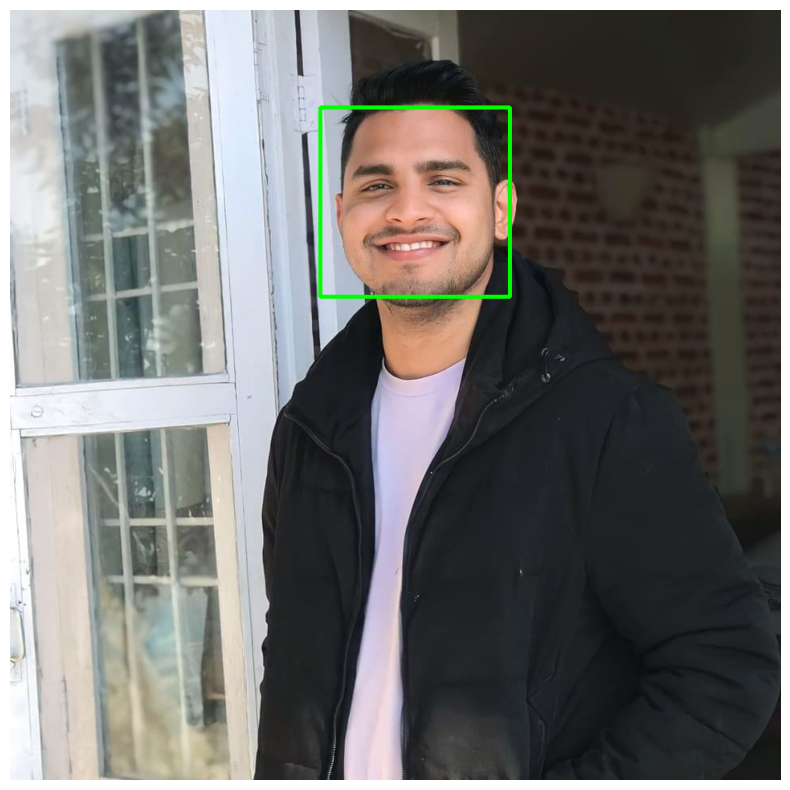

In [11]:
#plotting using matplotlib 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')